# EXAMPLE FOR LOGISTIC REGRESSION - TITANIC DATASET

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [6]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
print(titanic_dmy)

     Survived  Pclass   Age  SibSp  Parch      Fare  male  Q  S
0           0       3  22.0      1      0    7.2500     1  0  1
1           1       1  38.0      1      0   71.2833     0  0  0
2           1       3  26.0      0      0    7.9250     0  0  1
3           1       1  35.0      1      0   53.1000     0  0  1
4           0       3  35.0      0      0    8.0500     1  0  1
5           0       3  24.0      0      0    8.4583     1  1  0
6           0       1  54.0      0      0   51.8625     1  0  1
7           0       3   2.0      3      1   21.0750     1  0  1
8           1       3  27.0      0      2   11.1333     0  0  1
9           1       2  14.0      1      0   30.0708     0  0  0
10          1       3   4.0      1      1   16.7000     0  0  1
11          1       1  58.0      0      0   26.5500     0  0  1
12          0       3  20.0      0      0    8.0500     1  0  1
13          0       3  39.0      1      5   31.2750     1  0  1
14          0       3  14.0      0      

#### Checking for independence between features 

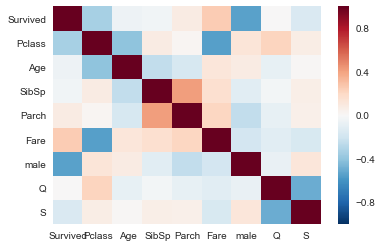

In [9]:
import seaborn as sb
sb.heatmap(titanic_dmy.corr()) 

In [18]:
titanic_dmy.drop(['Fare', 'Pclass'],axis=1,inplace=True)
titanic_dmy.head()

,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


In [11]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


#### Datasets preparation

In [17]:
X = titanic_dmy.ix[:,(1,2,3,4,5,6)].values
y = titanic_dmy.ix[:,0].values
print(X)
print('\n')
print(y[:100])

[[ 22.   1.   0.   1.   0.   1.]
 [ 38.   1.   0.   0.   0.   0.]
 [ 26.   0.   0.   0.   0.   1.]
 ..., 
 [ 24.   1.   2.   0.   0.   1.]
 [ 26.   0.   0.   1.   0.   0.]
 [ 32.   0.   0.   1.   1.   0.]]


[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0]


In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

array([[137,  27],
       [ 34,  69]])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       164
          1       0.72      0.67      0.69       103

avg / total       0.77      0.77      0.77       267

